In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# replacing blank with 0 in TotalCharges  as tenure is 0 and no TotalCharges are recorded
# changed the datatype from object to float

In [10]:
df["TotalCharges"]  = df["TotalCharges"].replace(" " , "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.isnull().sum().sum()

0

In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [19]:
df["customerID"].duplicated().sum()

0

In [25]:
def conv(value) :
    if value == 1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

# converted 0 and 1 values of SeniorCitizen tp Yes/No to make it easy to understand -->

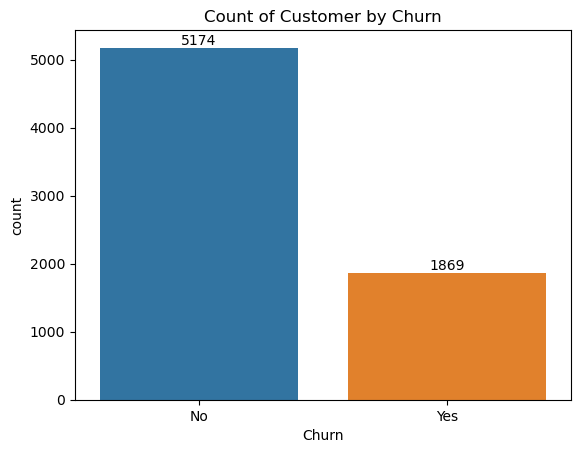

<Figure size 300x400 with 0 Axes>

In [53]:
ax = sns.countplot(x="Churn",data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.figure(figsize = (3,4))

plt.show()

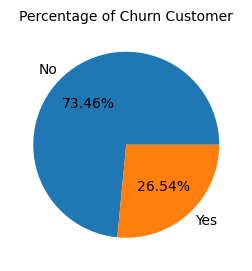

In [56]:
plt.figure(figsize = (3,4))

gb = df.groupby("Churn").agg({"Churn":"count"}) 
plt.pie(gb["Churn"],labels = gb.index , autopct = "%1.2f%%")
plt.title("Percentage of Churn Customer" , fontsize = 10)
plt.show()

# from the given pie chart we can conclude 26.54% of our customers have churned out.
# Now explore the reason behind it

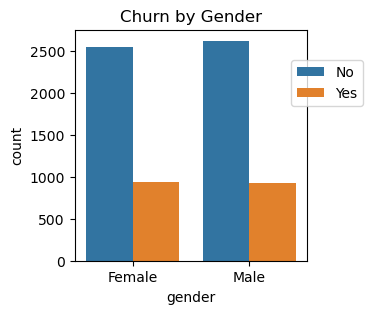

In [100]:
plt.figure(figsize =(3,3))
sns.countplot(x = "gender" , data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.legend(bbox_to_anchor = (0.9,0.9))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

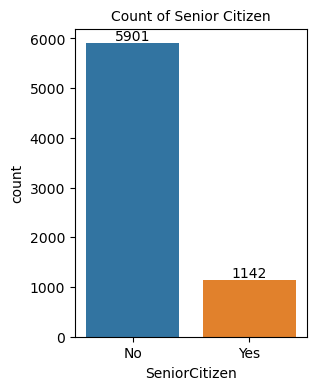

In [92]:
plt.figure(figsize = (3,4))
bx = sns.countplot(x ="SeniorCitizen",data = df)
bx.bar_label(bx.containers[0])
plt.title("Count of Senior Citizen",fontsize = 10)
plt.show

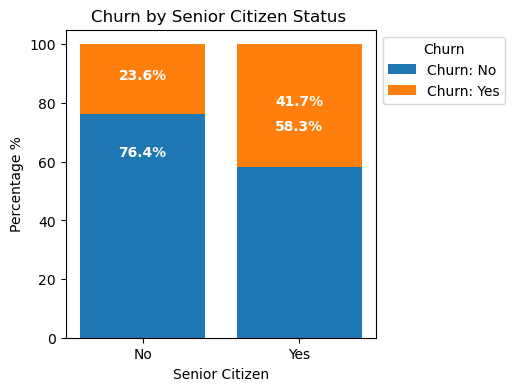

In [95]:
# Sample data
# Assuming your DataFrame 'df' is already defined with columns "SeniorCitizen" and "Churn"
# df = pd.DataFrame(...)

# Calculate the count of each combination of SeniorCitizen and Churn
counts = df.groupby(["SeniorCitizen", "Churn"]).size().unstack(fill_value=0)

# Calculate the total counts for each "SeniorCitizen" category to get percentages
totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0) * 100

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(4,4))
bottom = None

# Plot each Churn category as a segment in the stacked bar
for churn_category in percentages.columns:
    ax.bar(
        percentages.index, 
        percentages[churn_category], 
        label=f"Churn: {churn_category}", 
        bottom=bottom
    )
    bottom = percentages[churn_category] if bottom is None else bottom + percentages[churn_category]

# Adding percentage labels on each segment
for i, senior_citizen in enumerate(percentages.index):
    for j, churn_category in enumerate(percentages.columns):
        percentage = percentages.loc[senior_citizen, churn_category]
        if percentage > 0:
            ax.text(
                i, 
                bottom.iloc[i] - (percentage / 2),  # Adjust the label position within the bar
                f"{percentage:.1f}%", 
                ha="center", 
                color="white", 
                weight="bold"
            )

# Labels and title
ax.set_title("Churn by Senior Citizen Status ")
ax.set_xlabel("Senior Citizen")
ax.set_ylabel("Percentage %")
ax.legend(title="Churn" , bbox_to_anchor = (1,1))

plt.show()


# comparative a greater no. of senior citizen have churned out.

C:\Users\jriya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


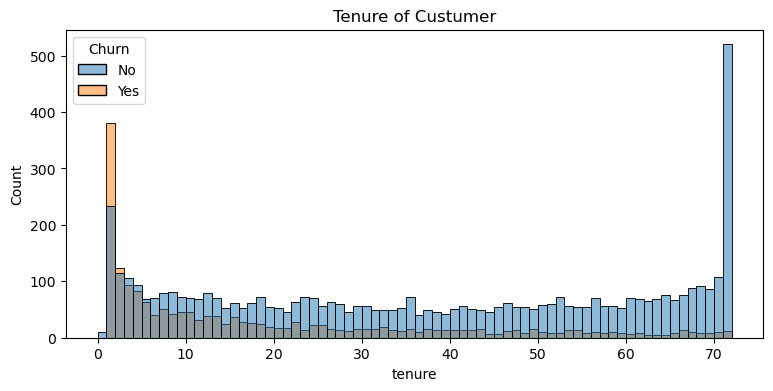

In [116]:
plt.figure(figsize = (9,4))
sns.histplot(x ="tenure",data = df,bins = 72,hue = "Churn")
plt.title("Tenure of Custumer")
plt.show()

# people who have used the service for a long time have stayed and people who have used our services 1 or 2 months have churned

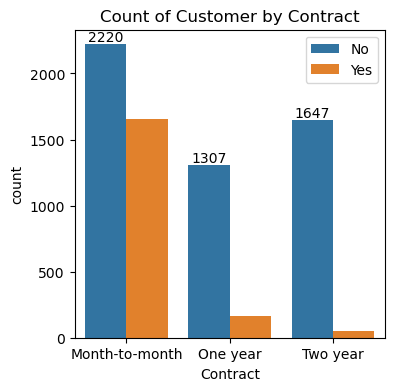

In [124]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x= "Contract", data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
plt.legend(bbox_to_anchor = (1,1))
plt.show()

# people who have month to month contract ae likely to churn than who have 1 or 2 years of contract

In [125]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

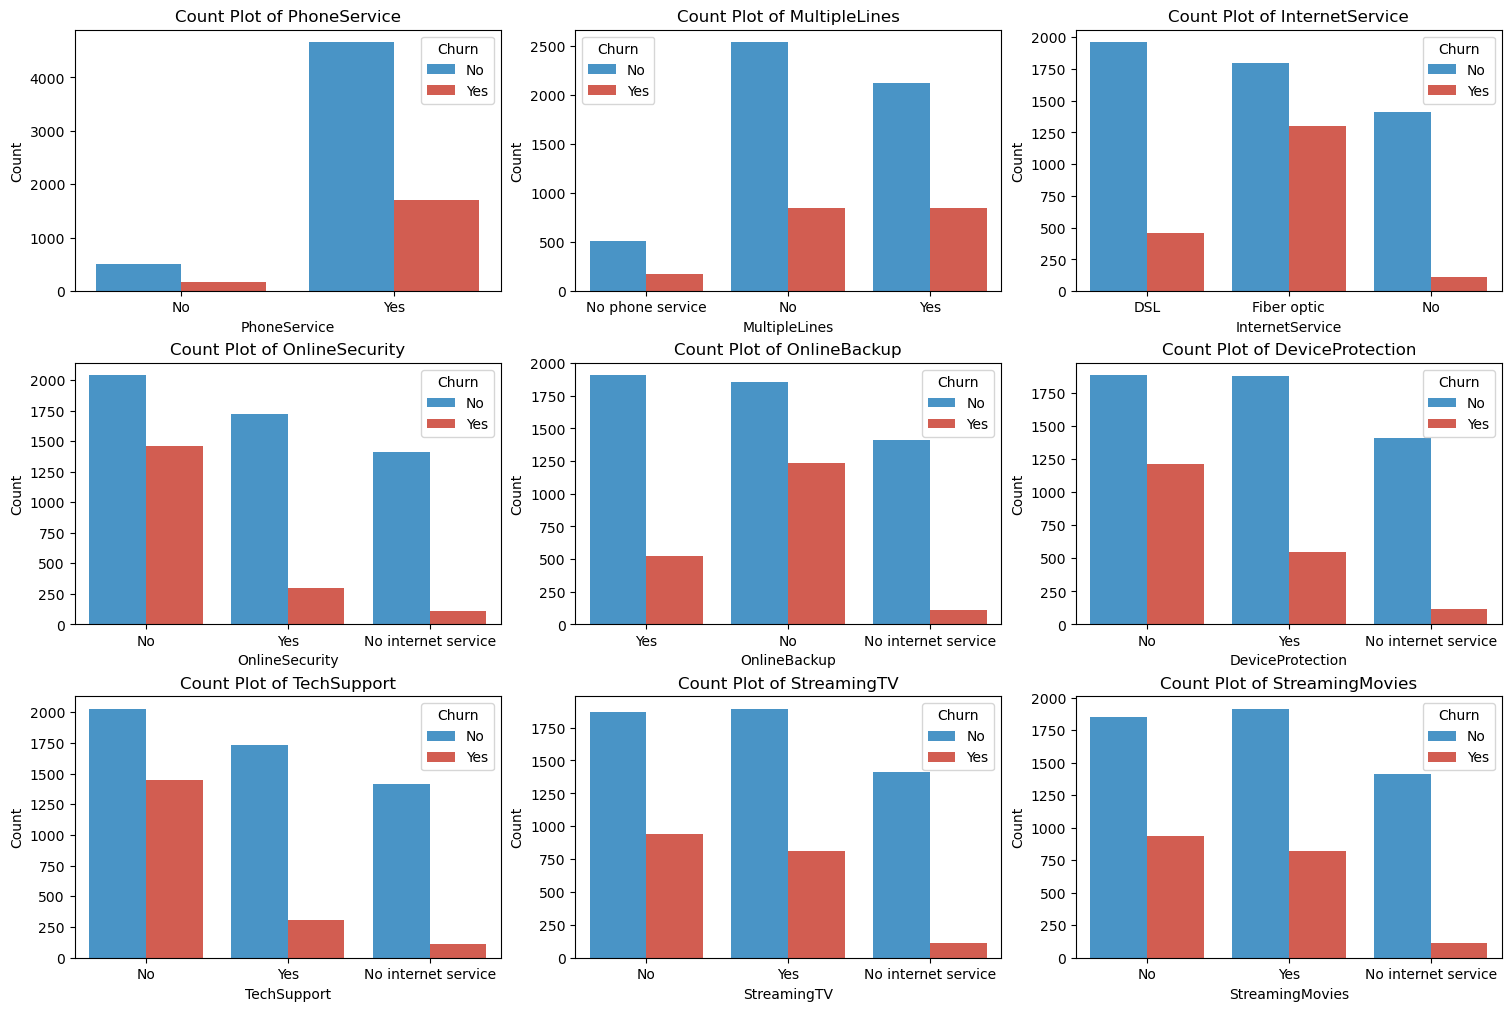

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns_to_plot = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up the figure with a grid of subplots
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # calculate rows needed for grid layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10), constrained_layout=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot each column as a count plot with blue and orange bars
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, data=df, ax=axes[i],hue='Churn')
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Hide any extra subplots if there are more slots than columns
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


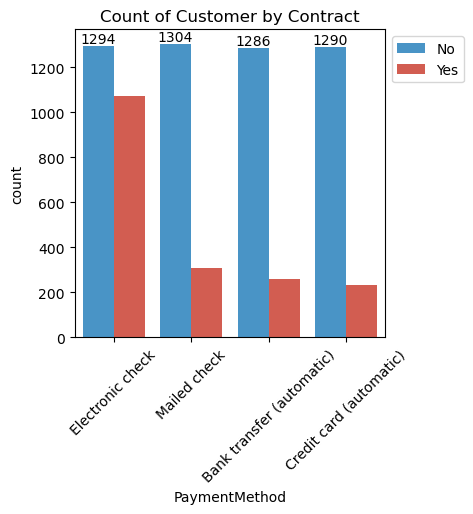

In [148]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x= "PaymentMethod", data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
plt.legend(bbox_to_anchor = (1,1))
plt.xticks(rotation = 45)

plt.show()

# customer is likely to churn when he is using electronic check as a payment method